In [1]:
%matplotlib inline
import matplotlib.pyplot
import seaborn
seaborn.set(rc={"figure.figsize": (12, 6)})
seaborn.set_color_codes()

In [2]:
import pandas
data = pandas.read_csv(r'C:\Users\martinX1\Dropbox\projects\PredictingClicks\content_train.tsv', sep='\t', header=0)
data.head()

,customer.id,content_1,content_2,content_3,content_4,content_5,content_6,content_7,content_8,content_9,...,extra.total.spend,fandf.no.transactions,fandf.total.spend,petrol.no.transactions,petrol.total.spend,direct.no.transactions,direct.total.spend,gender,affluency,county
0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,634.11,14,76.12,32,753.12,10,617.47,Female,Mid,Surrey
1,2,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,...,679.78,13,142.74,28,37.86,51,2787.49,Female,Mid,Greater Manchester
2,3,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,...,282.90,7,672.12,55,563.12,4,444.34,Female,Low,Greater Manchester
3,4,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,...,5954.89,49,2394.10,56,912.70,24,5859.31,Male,Mid,Brighton & Hove
4,5,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,...,3170.40,27,651.36,52,925.30,17,433.57,Female,Low,Norfolk


In [3]:
data.isnull().sum()

customer.id                       0
content_1                     53978
content_2                     57042
content_3                     72686
content_4                     61921
content_5                     55170
content_6                     50294
content_7                     61804
content_8                     61654
content_9                     51975
express.no.transactions           0
express.total.spend               0
metro.no.transactions             0
metro.total.spend                 0
superstore.no.transactions        0
superstore.total.spend            0
extra.no.transactions             0
extra.total.spend                 0
fandf.no.transactions             0
fandf.total.spend                 0
petrol.no.transactions            0
petrol.total.spend                0
direct.no.transactions            0
direct.total.spend                0
gender                            0
affluency                         0
county                            0
dtype: int64

In [4]:
content_list = ['content_1','content_2', 'content_3','content_4','content_5','content_6','content_7','content_8','content_9']

In [5]:
data[content_list][data[content_list] == 0].count().sum()

368685

In [8]:
data[content_list][data[content_list] == 1].count().sum()

4791

We have quite imbalance classes for content cliks

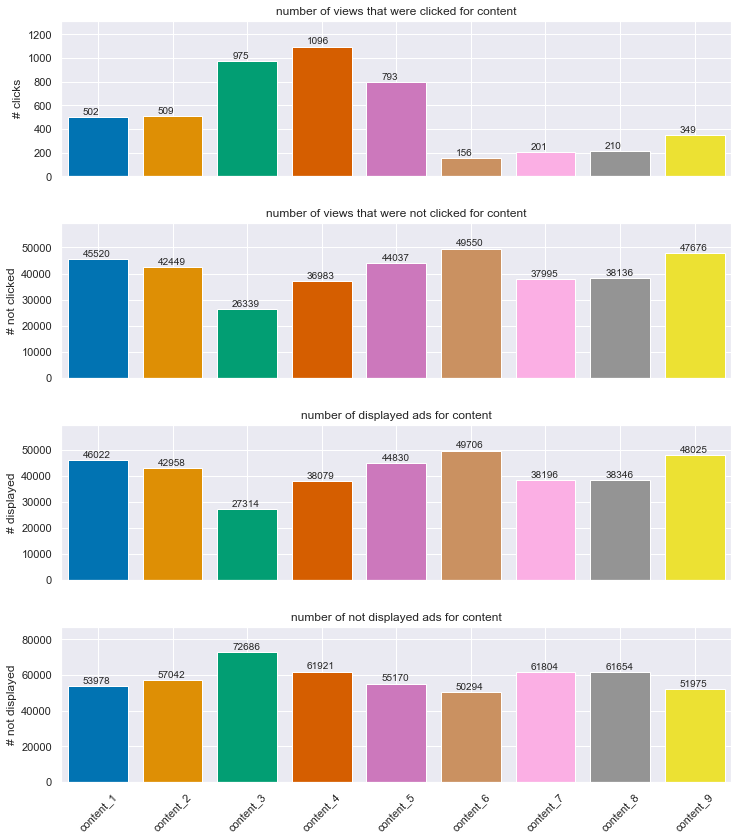

None


In [7]:
clicks = []
notclicked = []
displayed = []
notdisplayed = []
for content in content_list:
    displayed.append(data[content].notnull().sum())
    notdisplayed.append(data[content].isnull().sum())
    clicks.append(data[content].sum())
    notclicked.append(data[content][data[content] == 0].count())

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(12, 14)

axarr[0].bar(content_list, clicks, color=sns.color_palette("colorblind",len(content_list)))
axarr[0].set_ylabel('# clicks')
axarr[0].set_title('number of views that were clicked for content')
axarr[0].margins(x=0.01, y=0.2)

pad = max(clicks)*0.02
for k,v in enumerate(clicks):
    axarr[0].text(k-0.2,v+pad, int(v))
    
axarr[1].bar(content_list, notclicked, color=sns.color_palette("colorblind",len(content_list)))
axarr[1].set_ylabel('# not clicked')
axarr[1].set_title('number of views that were not clicked for content')
axarr[1].margins(x=0.01, y=0.2)

pad = max(notclicked)*0.02
for k,v in enumerate(notclicked):
    axarr[1].text(k-0.2,v+pad, int(v))    

axarr[2].bar(content_list, displayed, color=sns.color_palette("colorblind",len(content_list)))
axarr[2].set_ylabel('# displayed')
axarr[2].set_title('number of displayed ads for content')
axarr[2].margins(x=0.01, y=0.2)

pad = max(displayed)*0.02
for k,v in enumerate(displayed):
    axarr[2].text(k-0.2,v+pad, int(v))

axarr[3].bar(content_list, notdisplayed, color=sns.color_palette("colorblind",len(content_list)))
axarr[3].set_ylabel('# not displayed')
axarr[3].set_title('number of not displayed ads for content')
axarr[3].margins(x=0.01, y=0.2)

pad = max(notdisplayed)*0.02
for k,v in enumerate(notdisplayed):
    axarr[3].text(k-0.2,v+pad, int(v))    
    
fig.subplots_adjust(hspace=0.3)

plt.xticks(rotation=45)
print(plt.show())

In [6]:
numerical = ['express.no.transactions', 'express.total.spend','metro.no.transactions','metro.total.spend', \
             'superstore.no.transactions','superstore.total.spend','extra.no.transactions','extra.total.spend',\
             'fandf.no.transactions','fandf.total.spend','petrol.no.transactions','petrol.total.spend', \
             'direct.no.transactions','direct.total.spend']
categorical = ['gender','affluency','county']

In [9]:
data[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
express.no.transactions,100000.0,50.077260,19.086162,0.0,37.0000,50.000,63.0000,139.00
express.total.spend,100000.0,770.732722,895.273078,0.0,208.5275,494.255,1005.2225,19714.00
metro.no.transactions,100000.0,50.020490,19.163301,0.0,37.0000,50.000,63.0000,140.00
metro.total.spend,100000.0,1150.068912,1362.316593,0.0,308.7000,730.890,1484.6875,33630.24
superstore.no.transactions,100000.0,50.015830,19.042166,0.0,37.0000,50.000,63.0000,133.00
superstore.total.spend,100000.0,2822.343985,3358.896270,0.0,758.1675,1792.480,3660.3500,73988.49
extra.no.transactions,100000.0,49.865100,19.046875,0.0,37.0000,50.000,63.0000,148.00
extra.total.spend,100000.0,2819.090342,3365.456654,0.0,757.7675,1786.700,3652.7775,82972.69
fandf.no.transactions,100000.0,30.488380,18.195708,0.0,17.0000,30.000,43.0000,116.00
fandf.total.spend,100000.0,1043.523380,1399.247044,0.0,190.3775,586.435,1356.3050,40018.31


In [10]:
data['customer.id'].describe()

count    100000.000000
mean      50000.500000
std       28867.657797
min           1.000000
25%       25000.750000
50%       50000.500000
75%       75000.250000
max      100000.000000
Name: customer.id, dtype: float64

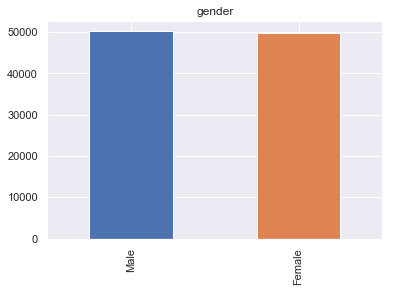

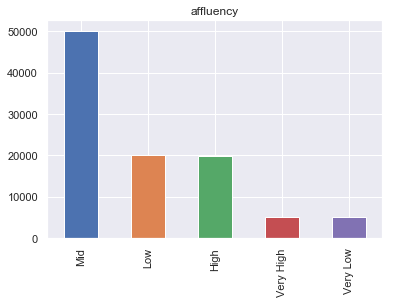

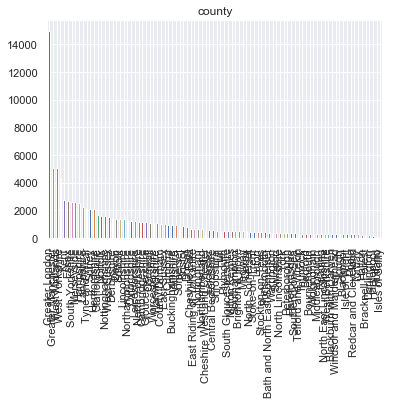

In [11]:
for s in categorical:
    data[s].value_counts().plot(kind='bar',title=s)
    matplotlib.pyplot.show()

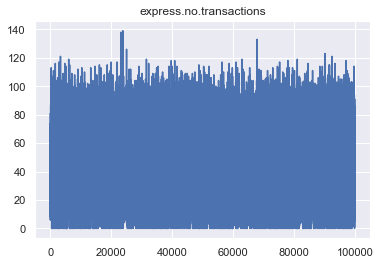

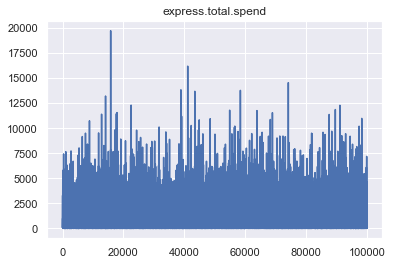

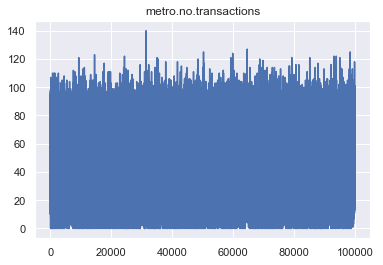

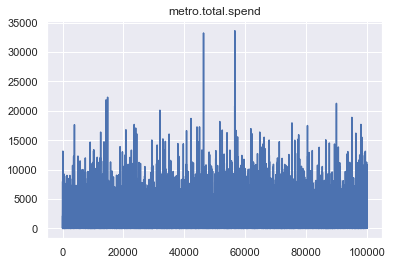

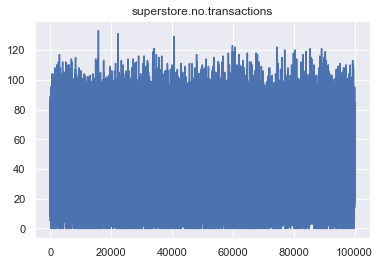

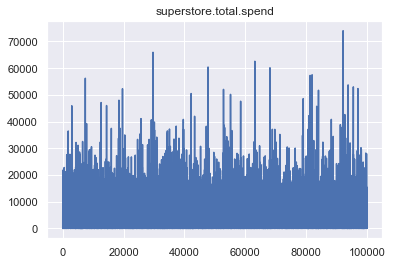

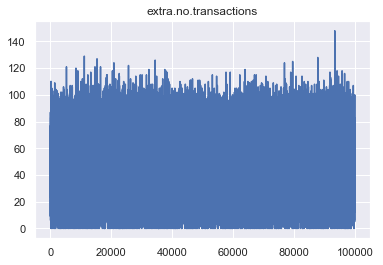

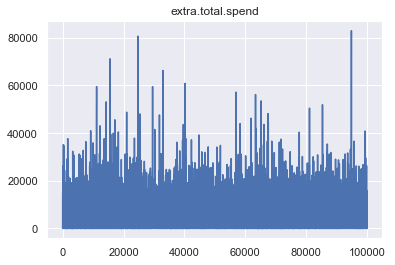

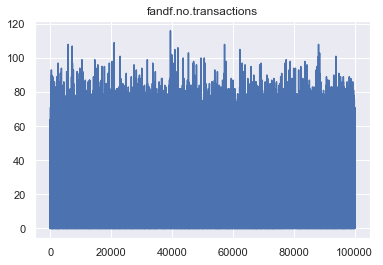

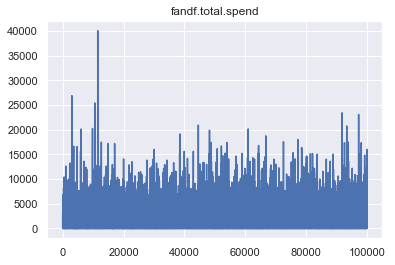

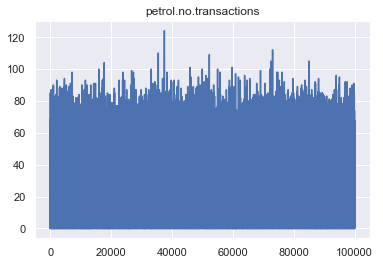

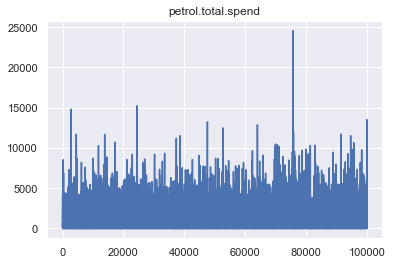

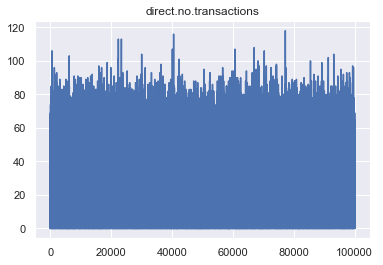

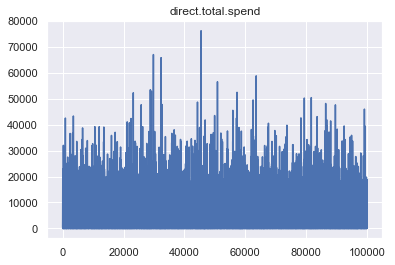

In [12]:
for s in numerical:
    data[s].plot(title=s)
    matplotlib.pyplot.show()

Sone of the numerical values are slightlly outstanding and the standard deviation is hight comparing to the mean, however it's not that extraordinary as in the data for Patr 1, hence I don't consider it as anomalous. 